In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import rc
from scipy import optimize
from scipy.optimize import curve_fit
import random
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

In [7]:
# define important constants
E_i = 50 #Mev, initial energy of kaon
c = 3e8 #m/s
X0 = 3.5 #mm
E0 = 493.677 # rest mass of K+
tau = 1.238e-8
# angle_sample = random.sample(range(0,1800),100)
# for i in range(np.size(angle_sample)):
#   angle_sample[i] = angle_sample[i]*np.pi/1800
    
x = np.linspace(0,99.99,10000)
print(x[10])

#50 
E_x_50 = 50 * np.exp(-x/X0)
v_50 = np.sqrt(1-(E_x_50/E0+1)**(-2))*c
gam = np.sqrt(1-(v_50/c)**2)
P_x_50 = np.exp(-x/(v_50*gam*tau))*(1/1.135302)

#100 
E_x_100 = 100 * np.exp(-x/X0)
v_100 = np.sqrt(1-(E_x_100/E0+1)**(-2))*c
gam_100 = np.sqrt(1-(v_100/c)**2)
P_x_100 = np.exp(-x/(v_100*gam_100*tau))*(1/1.39570)

#10 
E_x_10 = 10 * np.exp(-x/X0)
v_10 = np.sqrt(1-(E_x_10/E0+1)**(-2))*c
gam_10 = np.sqrt(1-(v_10/c)**2)
P_x_10 = np.exp(-x/(v_10*gam_10*tau))*(1/0.619773)




0.1


Text(0.5, 1.0, 'Velocity of K+ vs. Distance Travelled in Tungsten')

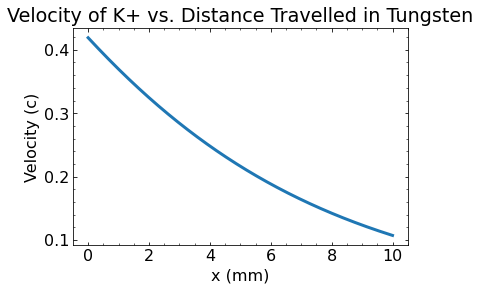

In [33]:
plt.plot(x,v/c)
plt.xlabel('x (mm)')
plt.ylabel('Velocity (c)')
plt.title('Velocity of K+ vs. Distance Travelled in Tungsten')

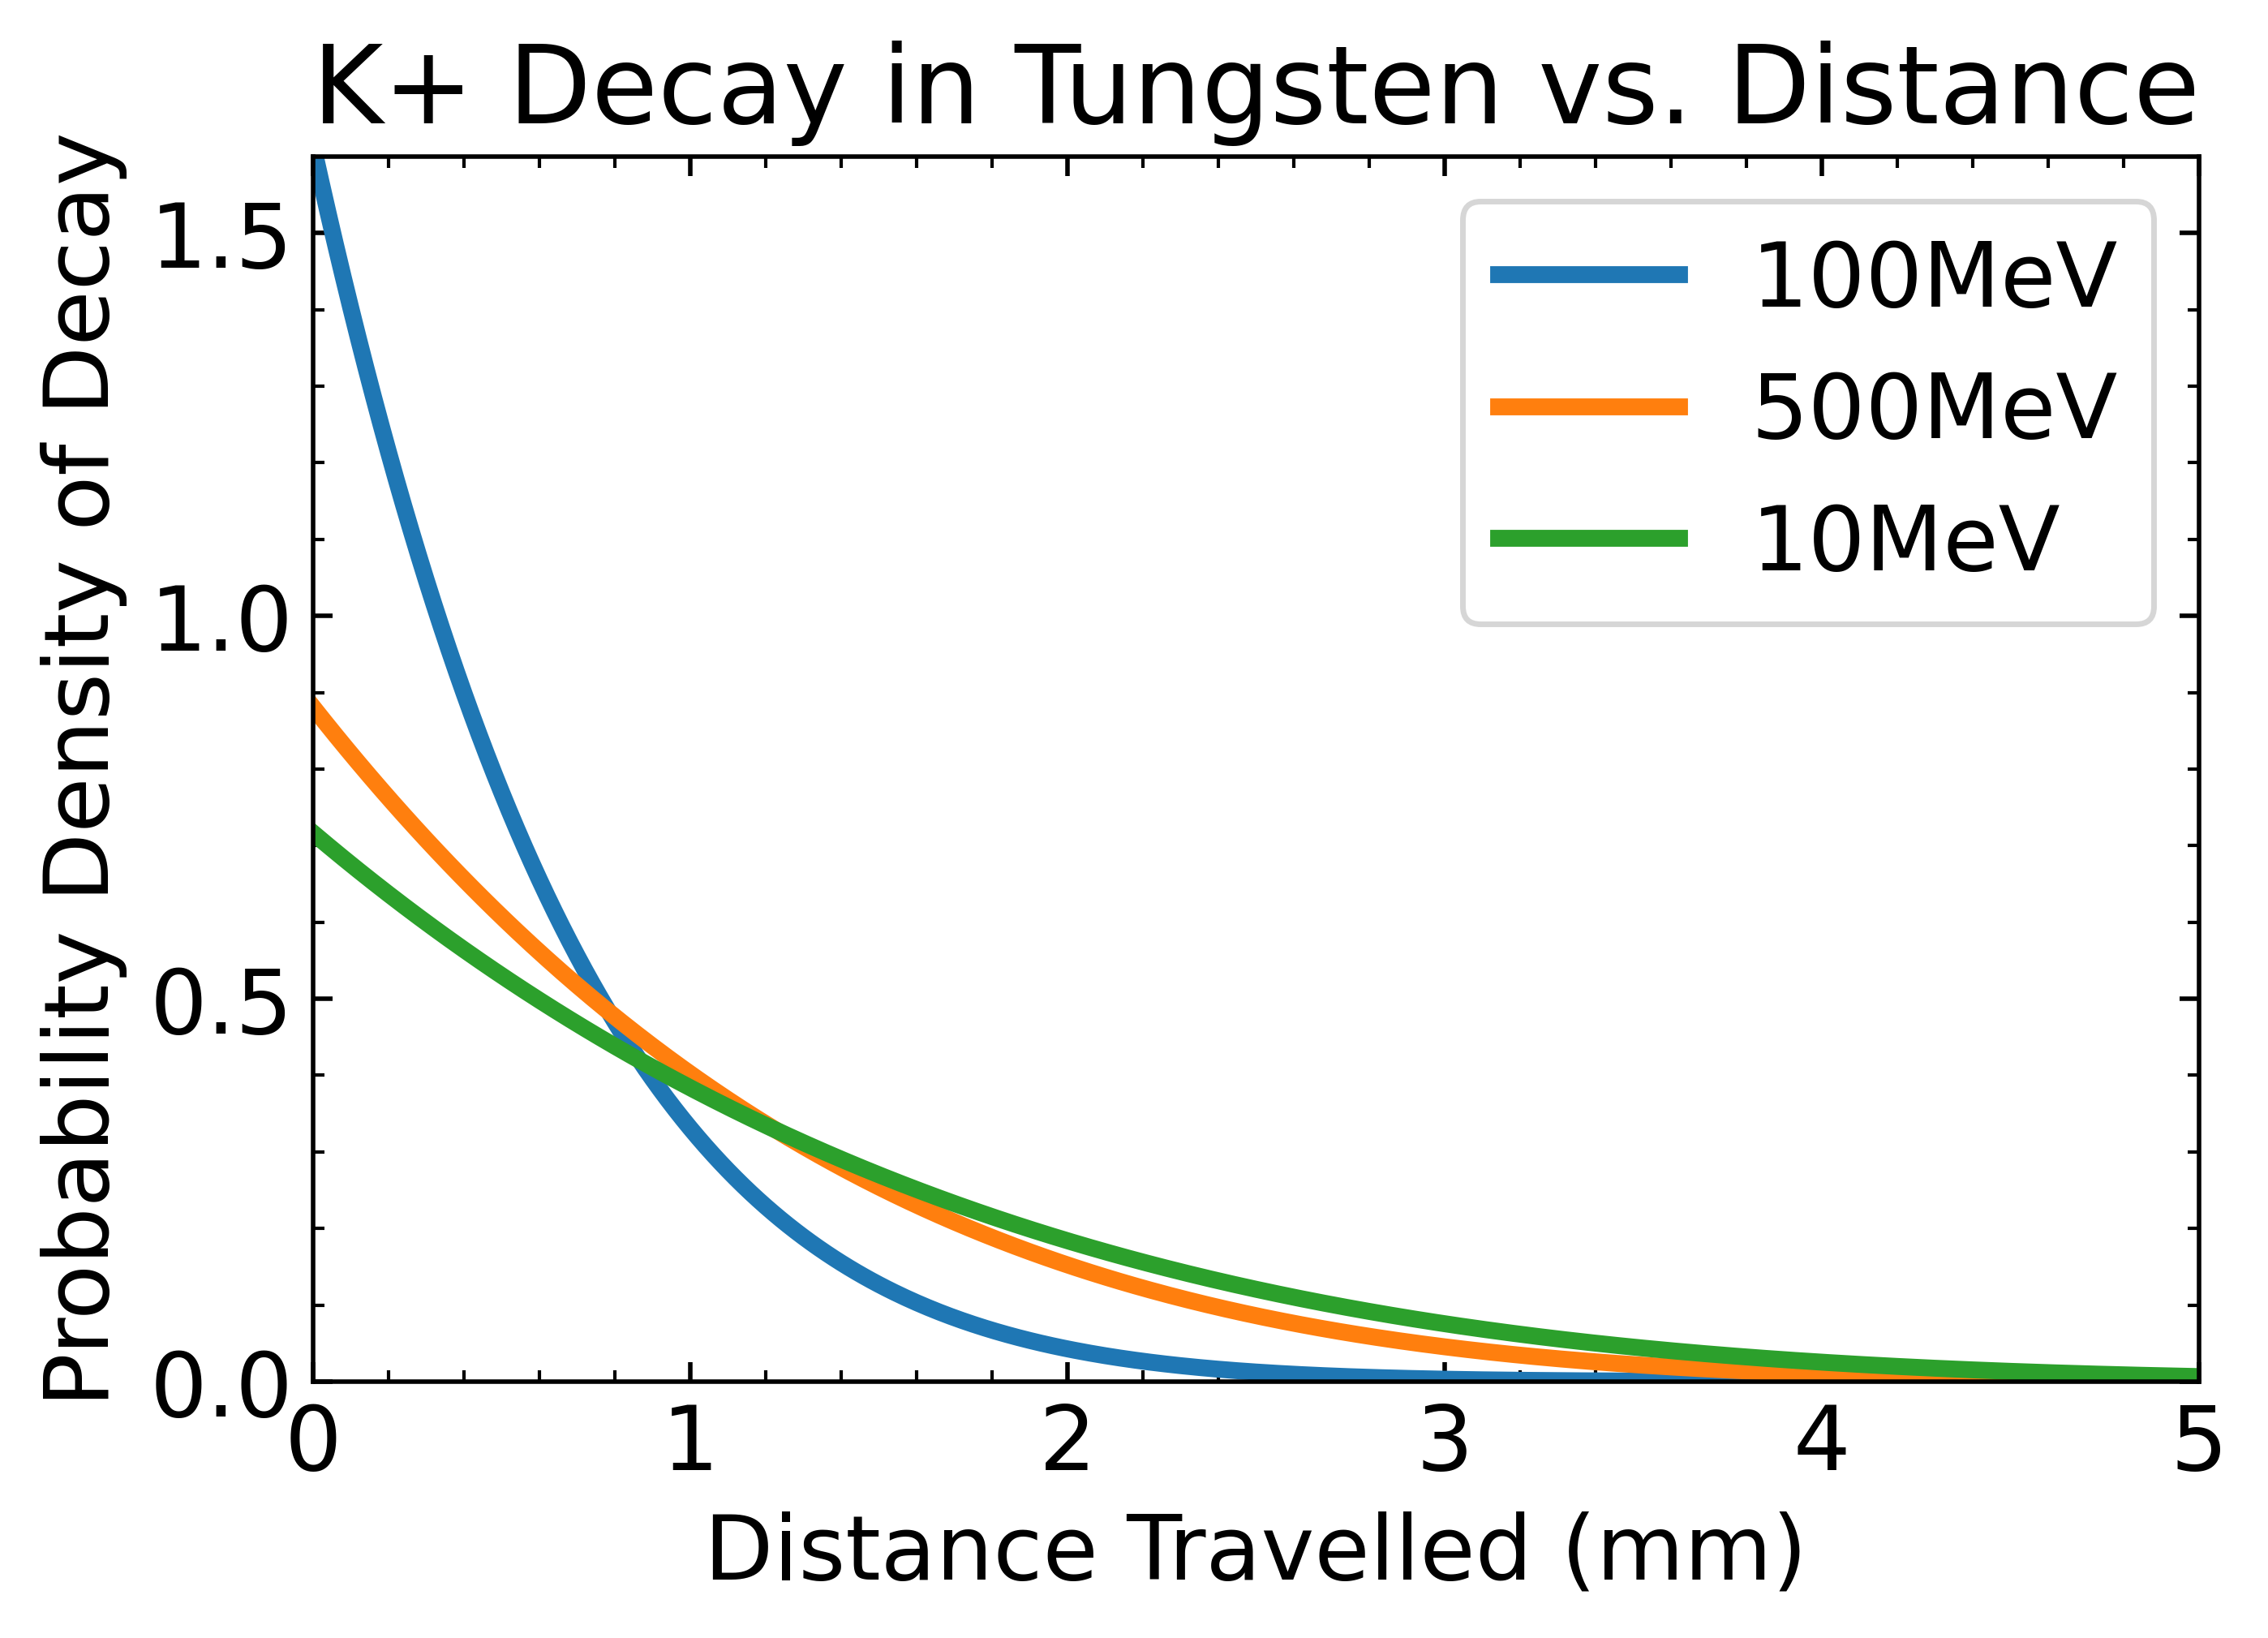

In [8]:
plt.figure(figsize=(6,4),dpi=500)
plt.plot(x,P_x_10,label='100MeV')
plt.plot(x,P_x_50,label='500MeV')
plt.plot(x,P_x_100,label='10MeV')
plt.xlabel('Distance Travelled (mm)')
plt.xlim(0,5)
plt.ylim(0,1.6)
plt.ylabel('Probability Density of Decay')
plt.title('K+ Decay in Tungsten vs. Distance')
plt.legend()

1.0000181711251581


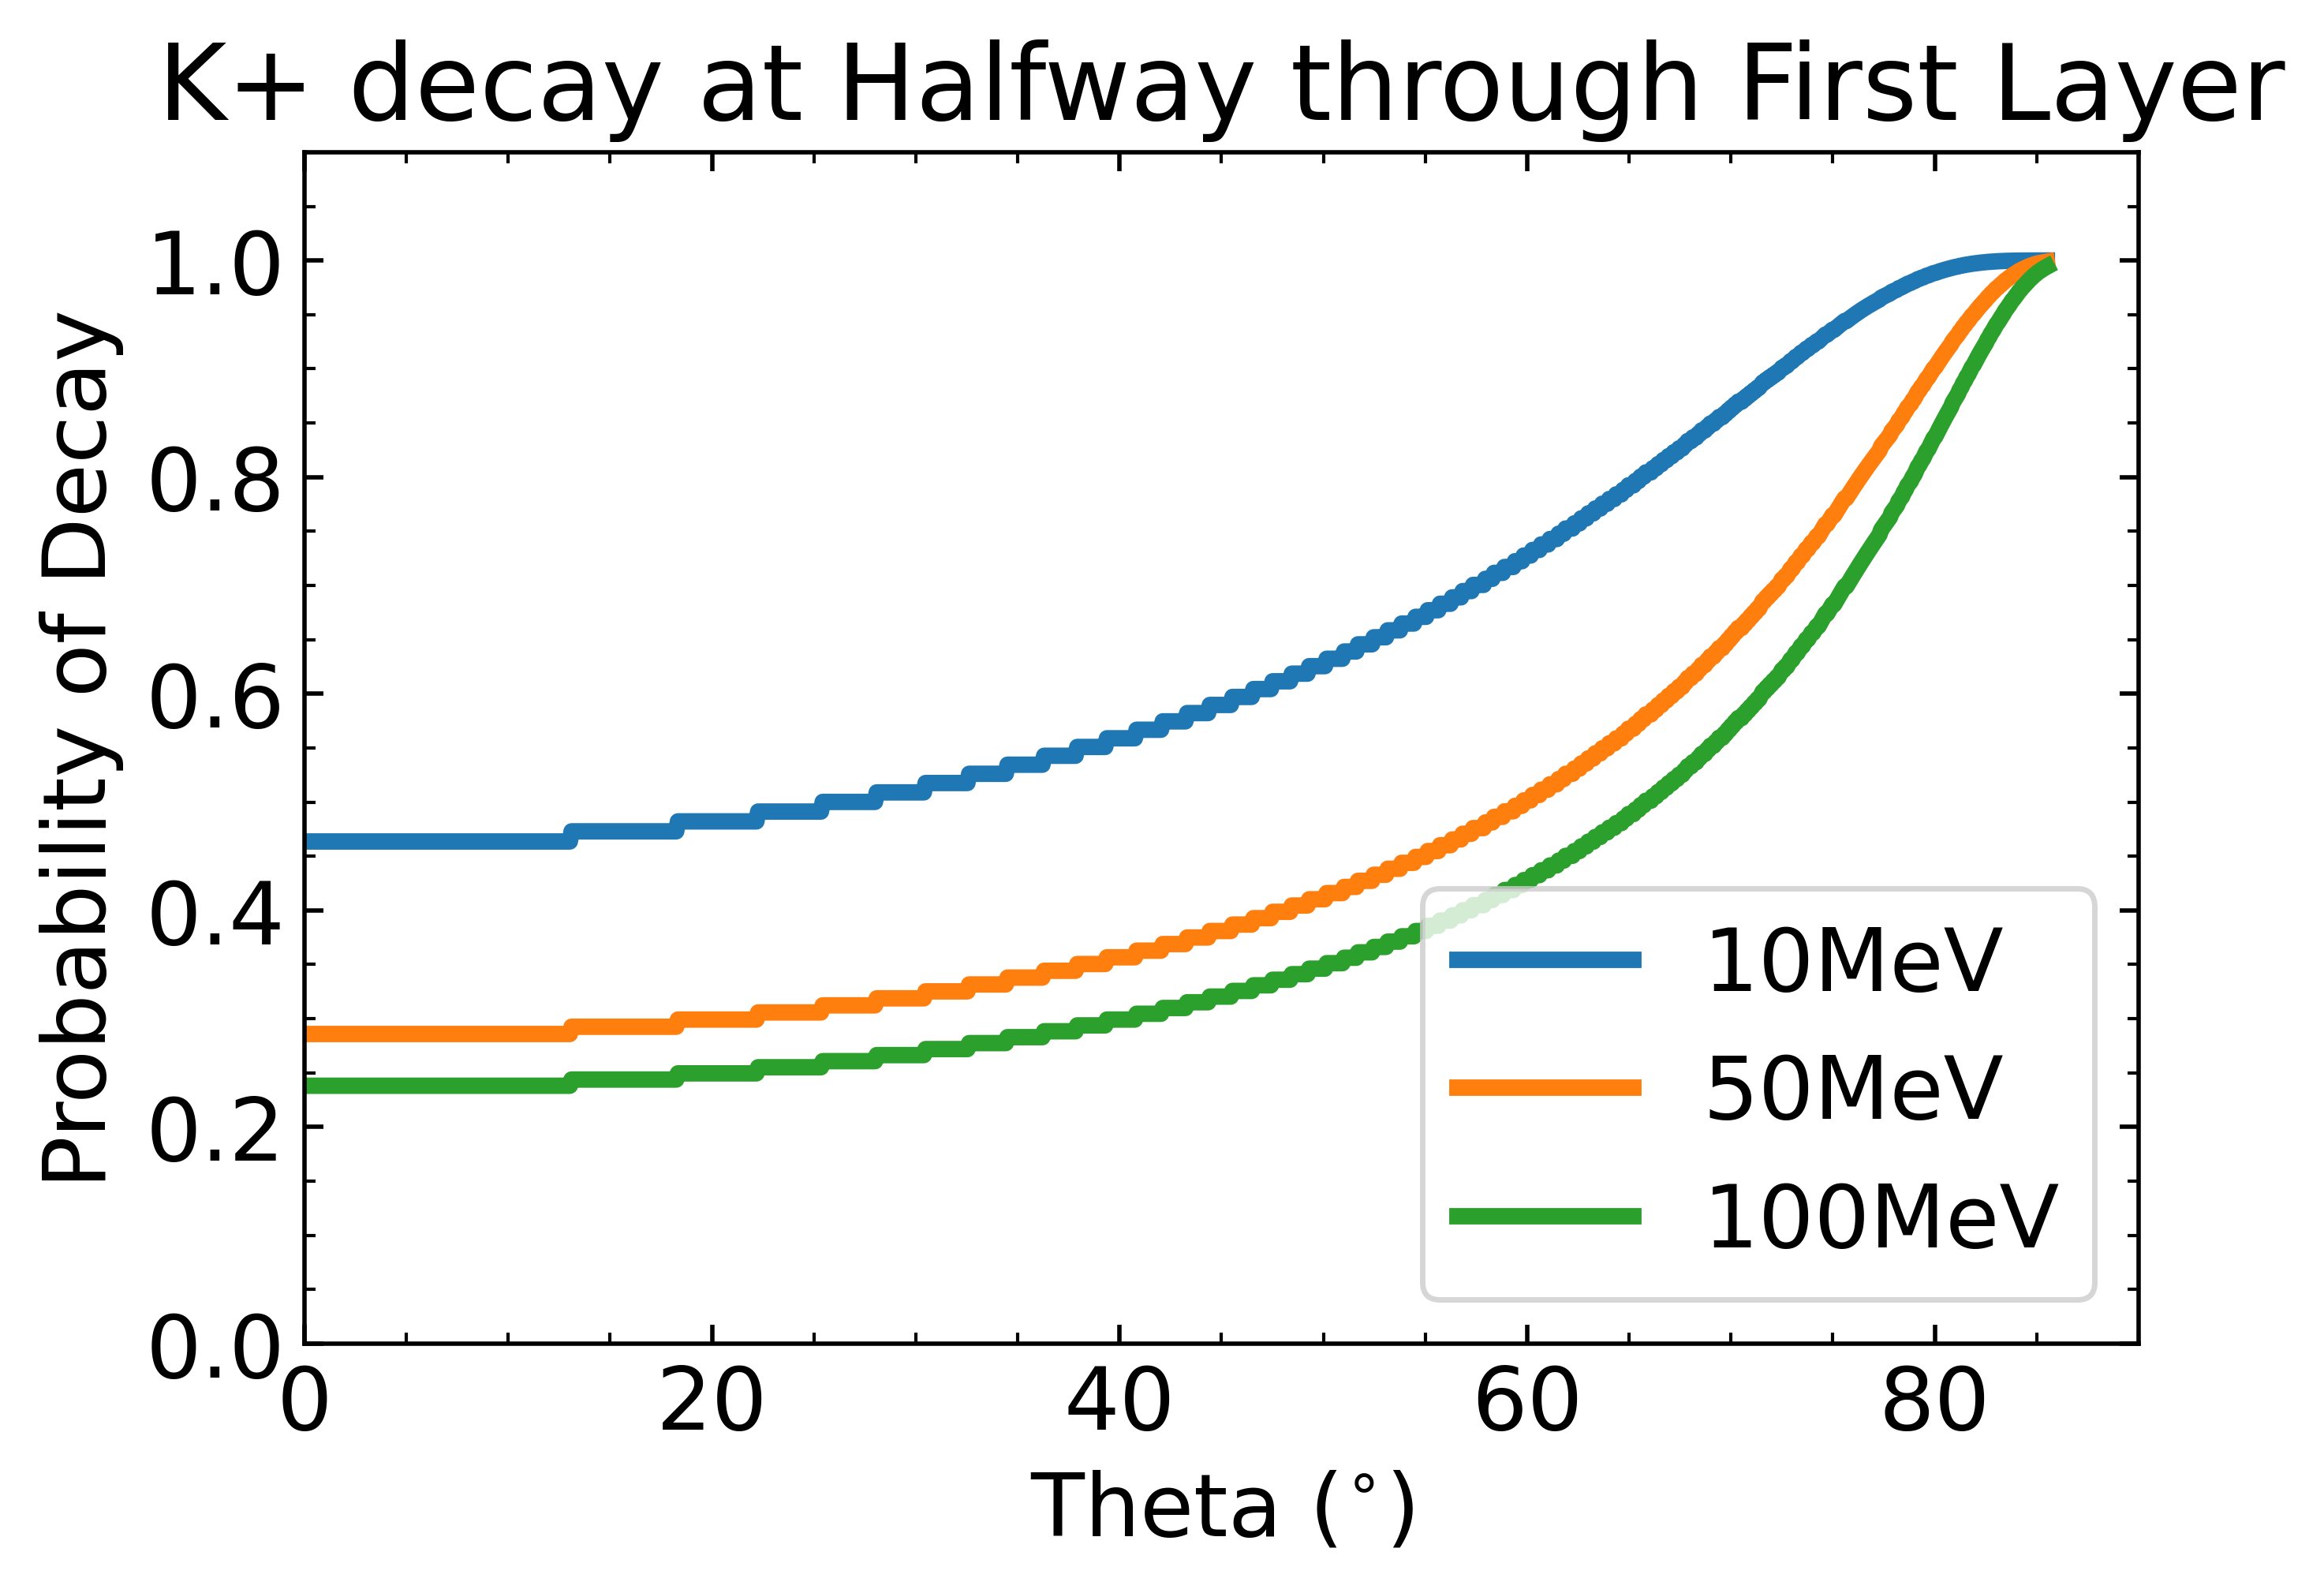

In [170]:
# In first layer, W_thickness = 0.75 mm
d1 = 0.75/2
thetas = np.linspace(0.1,85.5,999)
distances = d1/np.cos(thetas*np.pi/180)
distances_rounded = [0]*999
for i in range(np.size(distances)):
    distances_rounded[i] = round(distances[i],2)
dx = 0.01

# define integral from 0 to d
def integral_10(d):
    r = round(d*100) - 1
    sum = 0
    for i in range(r):
        sum = sum + (P_x_10[i+1]+P_x_10[i])*dx/2
    return sum

# define integral for 50 mev
def integral_50(d):
    r = round(d*100) - 1
    sum = 0
    for i in range(r):
        sum = sum + (P_x_50[i+1]+P_x_50[i])*dx/2
    return sum


# 100 mev
def integral_100(d):
    r = round(d*100) - 1
    sum = 0
    for i in range(r):
        sum = sum + (P_x_100[i+1]+P_x_100[i])*dx/2
    return sum
        
probabilities_10 = [0]*999
for i in range(999):
    probabilities_10[i] = integral_10(distances_rounded[i])
    
    
probabilities_50 = [0]*999
for i in range(999):
    probabilities_50[i] = integral_50(distances_rounded[i])
    
    
probabilities_100 = [0]*999
for i in range(999):
    probabilities_100[i] = integral_100(distances_rounded[i])

print(integral_10(8))

plt.figure(figsize=(6,4),dpi=500)
plt.plot(thetas,probabilities_10,label='10MeV')
plt.plot(thetas,probabilities_50,label='50MeV')
plt.plot(thetas,probabilities_100,label='100MeV')
plt.xlabel(r'Theta ($^{\circ}$)')
plt.xlim(0,90)
plt.ylim(0,1.1)
plt.ylabel('Probability of Decay')
plt.title('K+ decay at Halfway through First Layer')
plt.legend(loc='lower right')


In [ ]:
# trial

for event in tree :
    # do some analysis nonsense
    numhits = 0 
    for ecal_hit in event.EcalSimHits :
        numhits++
    h_ecal_hit_Position.Fill(numhits)
# end loop over events